<a href="https://colab.research.google.com/github/Ragdehl/Rakuten_py/blob/main/manu/TESTS_RAKUTEN_LOOP_3bis_TEXT_Bidirectional%2003072021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOOP 3 - TEST SIMPLE RNN 

In [1]:
import glob
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

In [3]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/X_train_update.csv',index_col =0)
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/Y_train_CVw08PX.csv',index_col=0)

In [4]:
y['label'] = y['prdtypecode'].replace(y.prdtypecode.unique(), [*range(len(y.prdtypecode.unique()))]) ## permet de simplifier les N°  de classes

In [5]:
X.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [6]:
# réalisation de la jointure des 2 colonnes texte du dataframe
headlines = []  #####
for row in range(0,len(X.index)):
    headlines.append(' '.join(str(x) for x in X.iloc[row,0:2]))

In [7]:
df = pd.DataFrame({'Features': headlines})

In [8]:
# ajout colonne label
df['label']=y['label']

In [9]:
# ajout colonne count_word
df["count_word"] = df['Features'].apply(lambda x : len(x.split(' ')))

In [10]:
df.head(15)

,Features,label,count_word
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,0,15
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,1,40
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,2,121
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,3,11
4,La Guerre Des Tuques Luc a des id&eacute;es de...,4,38
5,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,1,12
6,Christof E: Bildungsprozessen Auf Der Spur nan,0,7
7,Conquérant Sept Cahier Couverture Polypro 240 ...,5,32
8,Puzzle Scooby-Doo Avec Poster 2x35 Pieces nan,3,7
9,Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...,6,313


In [11]:
  import nltk
  nltk.download('stopwords')
  nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()

df.Features = df.Features.apply(lambda x :preprocess_sentence(x))
df.head()

,Features,label,count_word
0,olivia personalisiertes notizbuch seiten punkt...,0,15
1,journal des arts art son marche salon art asia...,1,40
2,grand stylet ergonomique bleu gamepad nintendo...,2,121
3,peluche donald europe disneyland marionnette d...,3,11
4,guerre des tuques luc des eacute grandeur . ve...,4,38


In [13]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, y_train, y_test = train_test_split(df.Features, df.label, test_size=0.3, random_state=1234)

In [14]:
X_text_train

65547    carte garbage pail kids les crados card topps ...
76168    helit planchette subdiviision pour bac fiches ...
42338                         siege auto marque runner nan
5412             lot magazines bandes dessinees suivre nan
80800    housse protection silicone avec couverture cas...
                               ...                        
32399                                      physiophile nan
82584    film solaire piscine ronde bleu film solaire p...
60620                    decalcomanies jabo superscale nan
34086    eva yoga pilates cork bloc mousse brique exten...
58067    chaise salle manger grise chaise salle manger ...
Name: Features, Length: 59441, dtype: object

In [15]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_text_train)

In [16]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

In [17]:
# Transformation en séquences de nombres entier
X_train = tokenizer.texts_to_sequences(X_text_train)
X_test = tokenizer.texts_to_sequences(X_text_test)

In [18]:
# Transformation en tableau numpy 
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [ ]:
import os
cwd = os.getcwd()
filepath = cwd

checkpoint = callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_loss', save_best_only = True, save_weights_only = False,
                                       mode = 'min', save_freq = 'epoch')

In [ ]:
lr_plateau = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=2, mode='min')

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
opt = Adam(lr=0.0007)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# LOOP 3-4

In [30]:
# Modèle RNN simple
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout, Bidirectional, LSTM
embedding_dim = 200 

model = Sequential()
model.add(Embedding(10000, 10000))
#model.add(Bidirectional(RNN(GRUCell(128, recurrent_initializer = 'glorot_uniform'))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.30))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.37))
model.add(Dense(27, activation='softmax'))

In [31]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train,
    batch_size = 64,
    epochs=5,
    validation_data = (X_test, y_test))

Epoch 1/5
929/929 [==============================] - 1495s 2s/step - loss: 1.4714 - accuracy: 0.5680 - val_loss: 0.8215 - val_accuracy: 0.7526
Epoch 2/5
929/929 [==============================] - 1471s 2s/step - loss: 0.6897 - accuracy: 0.7930 - val_loss: 0.7347 - val_accuracy: 0.7792
Epoch 3/5
929/929 [==============================] - 1467s 2s/step - loss: 0.5106 - accuracy: 0.8436 - val_loss: 0.7453 - val_accuracy: 0.7815
Epoch 4/5
929/929 [==============================] - 1466s 2s/step - loss: 0.4145 - accuracy: 0.8707 - val_loss: 0.7891 - val_accuracy: 0.7786
Epoch 5/5
929/929 [==============================] - 1464s 2s/step - loss: 0.3593 - accuracy: 0.8857 - val_loss: 0.8136 - val_accuracy: 0.7812


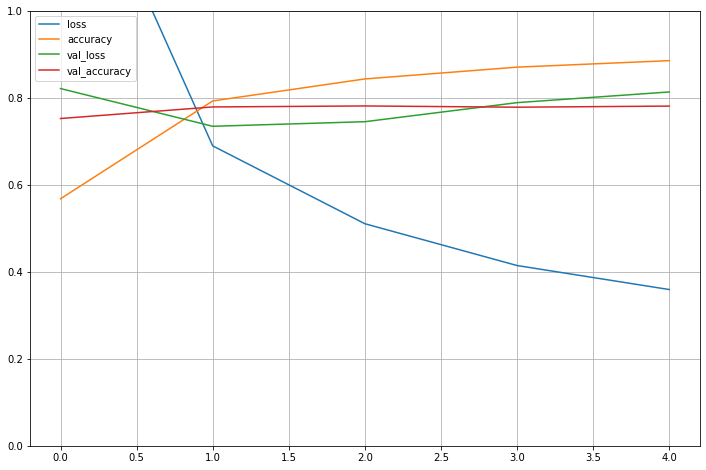

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()